# Euro Data Cube - Xcube Validation
## Test 4 xcube and GeoDB
This validation test demonstrates the following features: 
* TWorking with xcube and a GeoDB service:
    * Retrieve data from GeoDB
    * Rasterize vestor data to relate them to xcube raster data variable
   

## Requirements

To run this notebook you need your [Sentinel Hub API authentication](https://docs.sentinel-hub.com/api/latest/#/API/authentication) information and a Python environment
with `xcube` and the xcube plugin `xcube_sh` installed.

Checkout [xcube sources](https://github.com/dcs4cop/xcube) and follow instructions in its [README.md](https://github.com/dcs4cop/xcube/blob/master/README.md).

After activating the `xcube` Python environment, install additional packages required for Sentinel Hub API authentication:

```bash
$ conda activate xcube
(xcube) $ conda install -c conda-forge oauthlib
(xcube) $ pip install requests_oauthlib
```

Then checkout [xcube_sh sources](https://gitext.sinergise.com/dcfs/xcube-dcfs.git) and follow instructions in its [README.md](https://gitext.sinergise.com/dcfs/xcube-dcfs/blob/master/README.md).

Your Sentinel Hub API credentials can be passed as keyword arguments to the `SentinelHub` constructor (see below) or passed as environment variables (preferred): 

```bash
(xcube) $ export SH_CLIENT_ID=<your-id>
(xcube) $ export SH_CLIENT_SECRET=<your-secret>
```


In [1]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import rasterize_features_into_dataset
import matplotlib.pyplot as plt


In [2]:
import gdal

In [3]:
x1 = 10.10 # degree
y1 = 53.70  # degree
x2 = 10.8# degree
y2 = 54.30  # degree

bbox = x1, y1, x2, y2

In [4]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [10]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['B04'],
                         chunk_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2019-07-04', '2019-07-07'],
                         time_tolerance='1d')  

In [11]:
cube = open_cube(cube_config, request_warnings=True)

In [12]:
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 3584, lon: 4096, time: 3)
Coordinates:
  * lat        (lat) float64 54.35 54.34 54.34 54.34 ... 53.7 53.7 53.7 53.7
  * lon        (lon) float64 10.1 10.1 10.1 10.1 ... 10.84 10.84 10.84 10.84
  * time       (time) datetime64[ns] 2019-07-04T10:36:00 ... 2019-07-07T10:45:59
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2019-11-11T17:50:35.759472
    processing_level:        L2A
    time_coverage_start:     2019-07-04T10:35:51+00:00
    time_coverage_end:       2019-07-07T10:46:06+00:00
    time_coverage_duration:  P3DT0H10M15S
    geospatial_lon_min

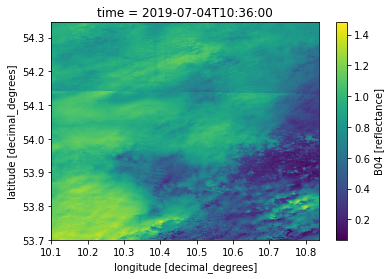

In [13]:
cube.B04.isel(time=0).plot.imshow()

## Do something

## Create geometry

In [13]:
import IPython.display

In [14]:
aoi = dict(type='Polygon', coordinates=[[[10.14,54.20],[10.14,54.22],[10.18,54.19],[10.19,54.18],[10.14,54.20]]] )

In [15]:
IPython.display.GeoJSON(aoi)

<IPython.display.GeoJSON object>

In [129]:
aoi

{'type': 'Polygon',
 'coordinates': [[[10.14, 54.2],
   [10.14, 54.22],
   [10.18, 54.19],
   [10.19, 54.18],
   [10.14, 54.2]]]}

In [24]:
masked_cubed = mask_dataset_by_geometry(cube,aoi)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 223, lon: 279, time: 125)
Coordinates:
  * lat        (lat) float64 54.22 54.22 54.22 54.22 ... 54.18 54.18 54.18 54.18
  * lon        (lon) float64 10.14 10.14 10.14 10.14 ... 10.19 10.19 10.19 10.19
  * time       (time) datetime64[ns] 2019-01-03T10:45:37 ... 2019-11-09T10:45:46
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(125, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(125, 5, 4), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.7
    date_created:               2019-11-11T16:05:21.333043
    geospatial_lat_max:         54.22022
    geospatial_lat_min:         54.180080000000004
    geospatial_lon_max:         10.1901
    geospatial_lon_min:         10.13988
    history:                    [{'config': {'band_names': ['B04'], 'band_sam...
    processing_level:           L2A
    time_coverage_duration:     P310